# Praticing on California Housing Dataset

## Performing EDA on the Dataset

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd


In [2]:
#Downloading data because fetch method is throwing HTTP error
cali_data = pd.read_csv('housing.csv')
cali_data.sample(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6787,-118.15,34.09,27.0,1935.0,460.0,1456.0,382.0,2.8062,192800.0,<1H OCEAN
20379,-118.83,34.15,16.0,3380.0,731.0,1227.0,641.0,4.2857,233200.0,NEAR OCEAN
12331,-116.48,33.96,11.0,1381.0,300.0,644.0,248.0,2.3382,89400.0,INLAND
13033,-121.20,38.66,17.0,1605.0,217.0,732.0,241.0,5.4700,204800.0,INLAND
2710,-115.73,32.80,44.0,472.0,81.0,206.0,57.0,2.2083,93800.0,INLAND
5526,-118.41,33.97,37.0,1629.0,275.0,668.0,266.0,6.1333,387200.0,<1H OCEAN
11523,-118.05,33.73,25.0,2472.0,450.0,1301.0,467.0,5.0699,266100.0,<1H OCEAN
13315,-117.65,34.06,41.0,465.0,130.0,349.0,138.0,2.0893,112500.0,INLAND
1577,-122.02,37.80,11.0,6200.0,907.0,2286.0,896.0,7.6518,359300.0,NEAR BAY
6720,-118.13,34.12,46.0,3156.0,430.0,1109.0,423.0,10.7397,500001.0,<1H OCEAN


In [3]:
cali_data = cali_data.drop(columns='ocean_proximity')

In [4]:
cali_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
from sklearn.impute import KNNImputer

knni = KNNImputer(n_neighbors=2, weights='uniform')
fixed_dataset = knni.fit_transform(cali_data)

cali_data = pd.DataFrame(fixed_dataset, columns=cali_data.columns)

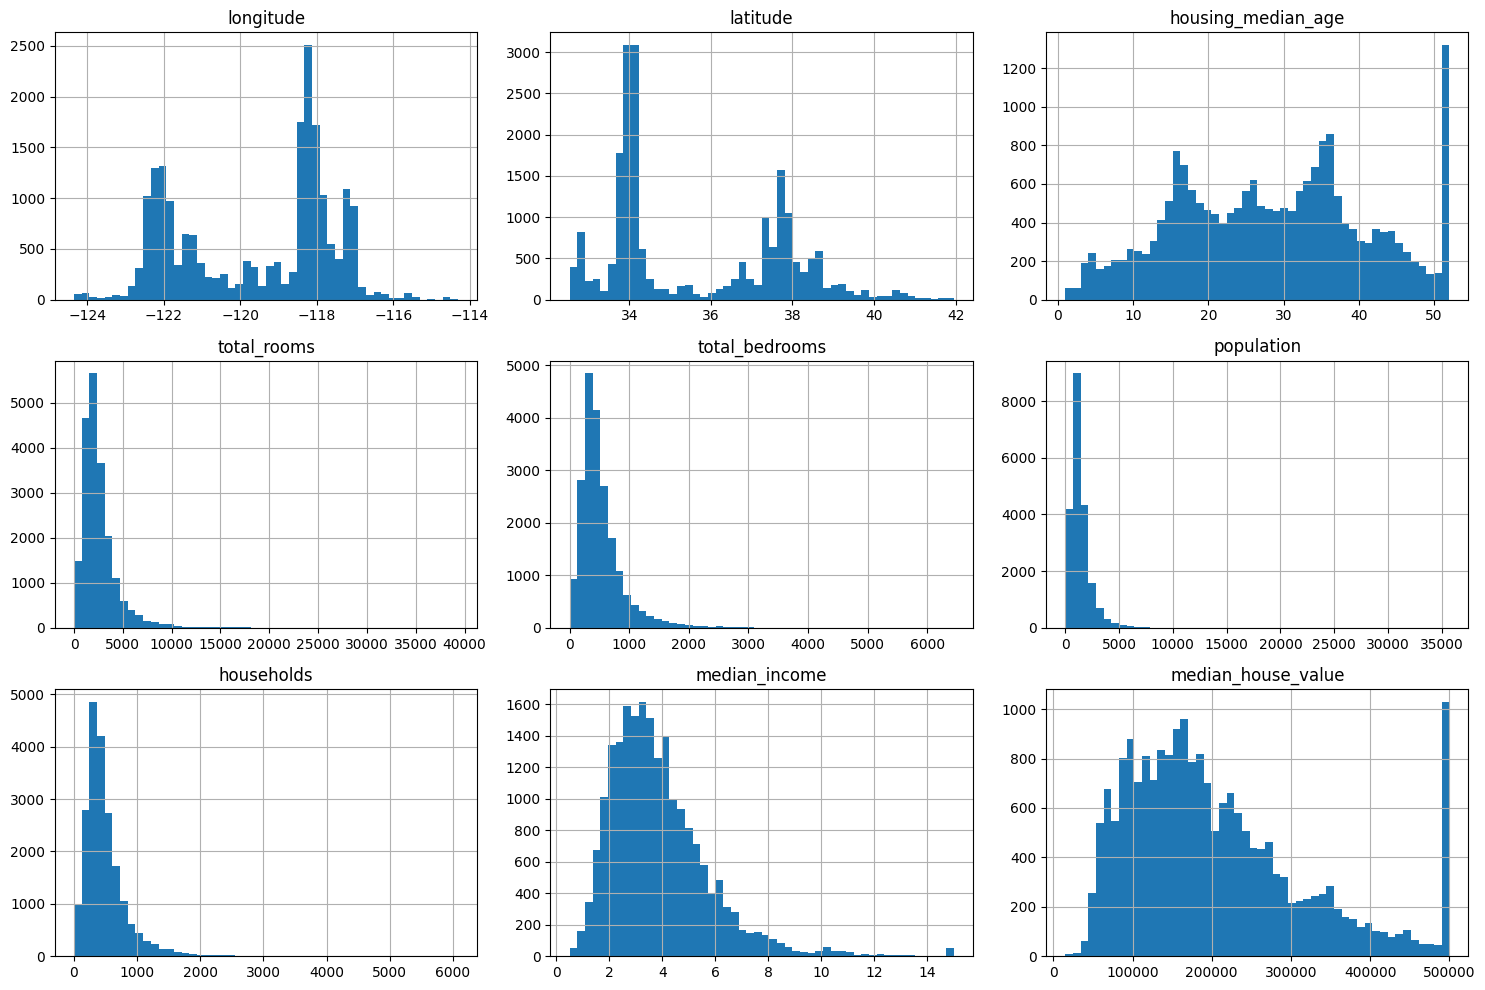

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

cali_data.hist(bins=50, figsize=(15,10))
plt.tight_layout()
plt.show()


In [7]:
cali_data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20640.0,537.551744,420.461593,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


It can be observed that there is a vast difference between `75%` and `max`. There are outliers that needs to be dealth with

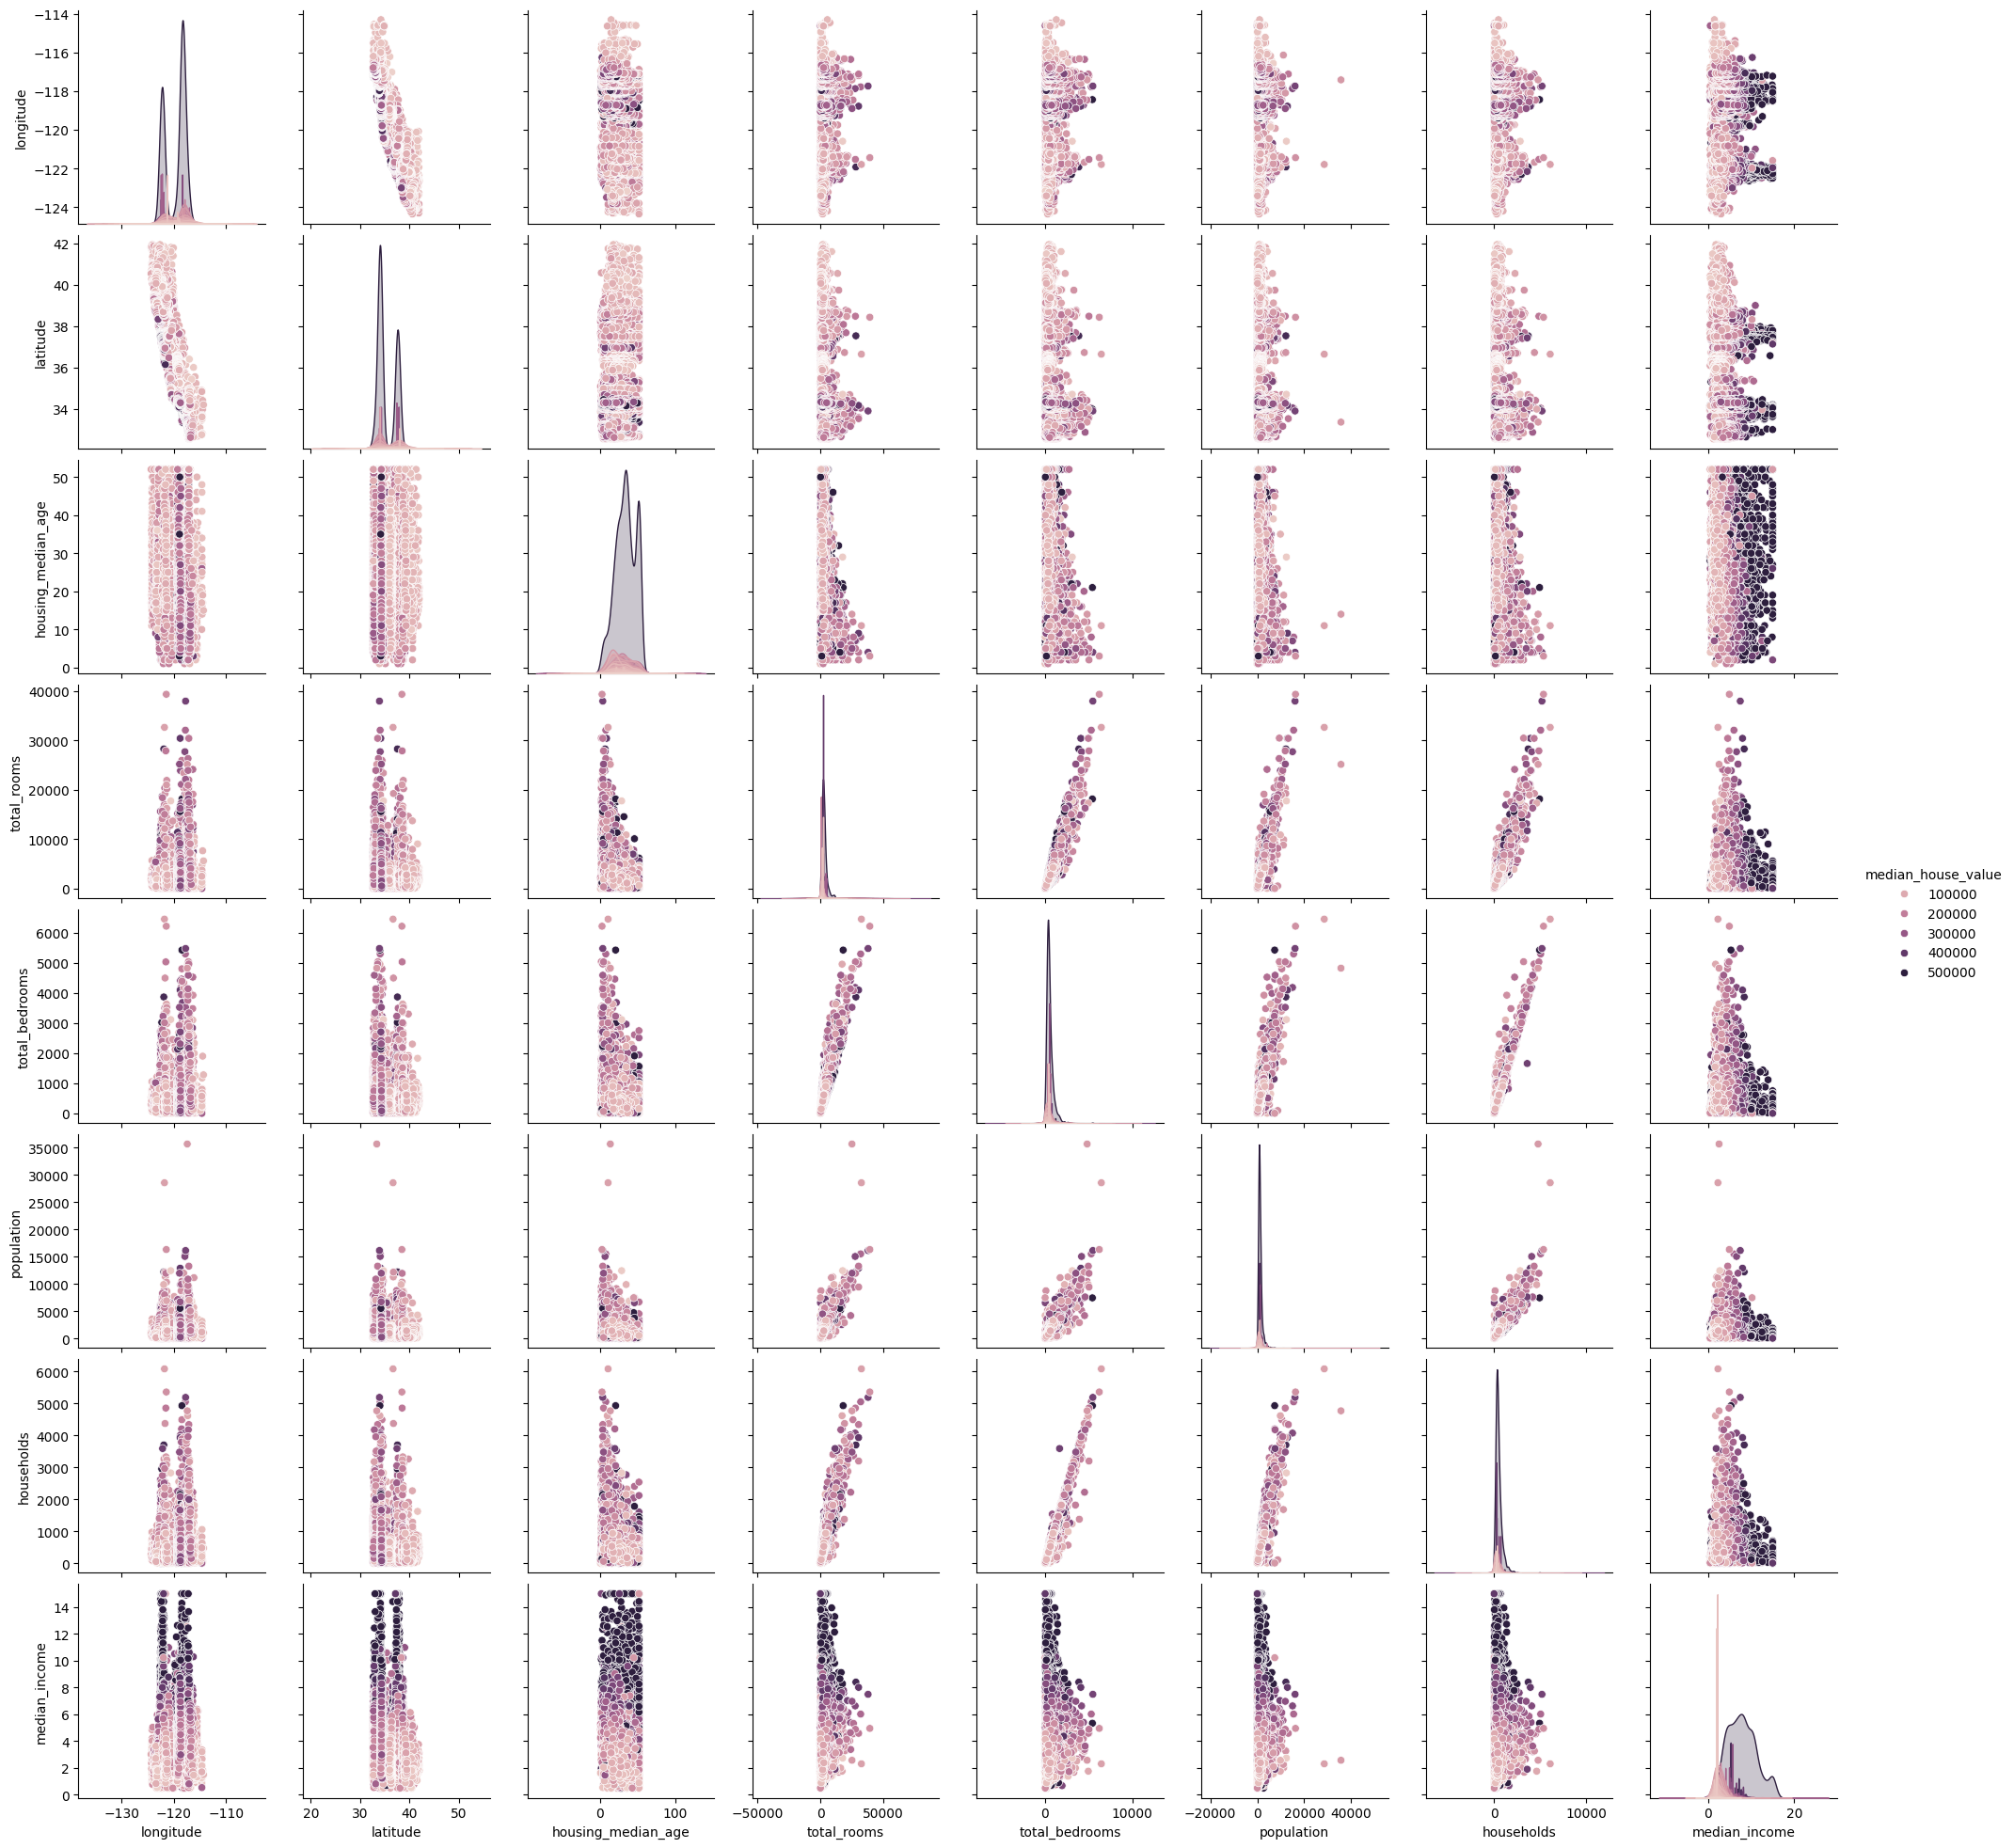

In [8]:
sns.pairplot(data=cali_data, hue='median_house_value')

A few observations based on pairplot:
- MedIncome seems to be useful in distinguishing between low and high valued houses.
- A few features have extreme values.
- Latitude and longitude together seem to distinguish between low and high valued houses.

## Building a Linear Regression Model

we will build different linear regression models for california house price prediction:
1. Linear regression (with normal equation and iterative optimization)
2. Polynomial regression
3. Regularized regression models - ridge and lasso.
- We will set regularization rate and polynomial degree with hyper-parameter tuning and cross validation.
- We will compare different models in terms of their parameter vectors and mean absolute error on train, devel and test sets.

### Imporing Libraries

In [9]:
import numpy as np
import pandas as pd

from scipy.stats import loguniform, uniform
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split, ShuffleSplit, validation_curve, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

### Common Setup

In [10]:
np.random.seed(306)

Let's use ShuffleSplit as cv with 10 splits, 20% examples set aside as test examples

In [11]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

### Data Loading and Spliting

In [ ]:
X = cali_data.drop(columns=['median_house_value'])
y = cali_data['median_house_value']/100000 #Converting House prices on the scale of 100,000

In [21]:
com_train_features, test_features, com_train_labels, test_labels, = train_test_split(X,y, random_state=42)

# We will again split X_train and y_train further into training and development set
train_features, dev_features, train_labels, dev_labels = train_test_split(com_train_features, com_train_labels, random_state=42)

### Linear Regression with Normal Equation

In [22]:
lin_reg_pipeline = Pipeline([
    ("feature_scaling", StandardScaler()),
    ("lin_reg", LinearRegression())
])
lin_reg_cv_results = cross_validate(lin_reg_pipeline, com_train_features, com_train_labels, cv=cv, scoring = "neg_mean_absolute_error",
                                    return_train_score=True, return_estimator=True)

lin_reg_train_error = -1 * lin_reg_cv_results['train_score']
lin_reg_test_error = -1 * lin_reg_cv_results['test_score']

print(f"Mean absolute error of linear regression model on the train set:\n"
      f"{lin_reg_train_error.mean():.3f} +/- {lin_reg_train_error.std():.3f}")
print (f"Mean absolute error of linear regression model on the test set: \n" 
       f"{lin_reg_test_error.mean():.3f} +/- {lin_reg_test_error.std():.3f}")

Mean absolute error of linear regression model on the train set:
0.508 +/- 0.002
Mean absolute error of linear regression model on the test set: 
0.503 +/- 0.007


### Linear Regression with SGD

In [25]:
sgd_reg_pipeline = Pipeline([
    ("feature_scaling", StandardScaler()),
    ("sgd_reg", SGDRegressor(
        max_iter = int(np.ceil(1e6 / com_train_features.shape[0])),
        early_stopping = True,
        eta0= 1e-4,
        learning_rate='constant',
        tol=1e-5,
        validation_fraction=0.1,
        n_iter_no_change=5,
        average=10,
        random_state=42
    ))
])

sgd_reg_cv_results = cross_validate(sgd_reg_pipeline, com_train_features, com_train_labels, cv=cv,
                                    scoring='neg_mean_absolute_error', return_train_score=True, return_estimator=True)


sgd_reg_train_error = -1 * sgd_reg_cv_results['train_score']
sgd_reg_test_error = -1 * sgd_reg_cv_results['test_score']

print(f"Mean absolute error of linear regression model on the train set:\n"
      f"{sgd_reg_train_error.mean():.3f} +/- {sgd_reg_train_error.std():.3f}")
print (f"Mean absolute error of linear regression model on the test set: \n" 
       f"{sgd_reg_test_error.mean():.3f} +/- {sgd_reg_test_error.std():.3f}")

Mean absolute error of linear regression model on the train set:
0.509 +/- 0.003
Mean absolute error of linear regression model on the test set: 
0.504 +/- 0.008


### Polynomial Regression Model with Degree 2

In [33]:
poly_reg_pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("feature_scaling", StandardScaler()),
    ("lin_reg", LinearRegression())
])

poly_reg_cv_results = cross_validate(poly_reg_pipeline, com_train_features, com_train_labels, cv=cv, scoring = "neg_mean_absolute_error",
                                    return_train_score=True, return_estimator=True)

poly_reg_train_error = -1 * poly_reg_cv_results['train_score']
poly_reg_test_error = -1 * poly_reg_cv_results['test_score']

print(f"Mean absolute error of linear regression model on the train set:\n"
      f"{poly_reg_train_error.mean():.3f} +/- {lin_reg_train_error.std():.3f}")
print (f"Mean absolute error of linear regression model on the test set: \n" 
       f"{poly_reg_test_error.mean():.3f} +/- {lin_reg_test_error.std():.3f}")

Mean absolute error of linear regression model on the train set:
0.452 +/- 0.002
Mean absolute error of linear regression model on the test set: 
0.450 +/- 0.007


### Finding best degree Using ValidationCurve

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


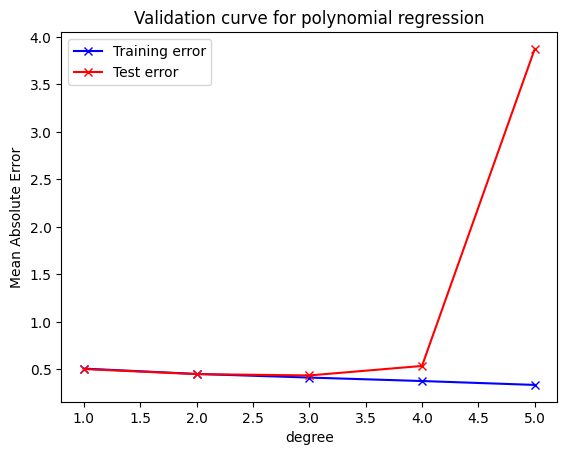

In [34]:
degree = [1,2,3,4,5]
train_scores, test_scores = validation_curve(
    poly_reg_pipeline, com_train_features, com_train_labels, param_name="poly__degree", param_range=degree, cv=cv, scoring='neg_mean_absolute_error',
    n_jobs=2
)

train_error, test_error = -train_scores, -test_scores
plt.plot(degree, train_error.mean(axis=1), 'b-x', label="Training error") 
plt.plot(degree, test_error.mean(axis=1), 'r-x', label="Test error")
plt.legend()
plt.xlabel("degree")
plt.ylabel('Mean Absolute Error')
plt.title("Validation curve for polynomial regression")
plt.show()